In [75]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
import analysis_utils as utils
utils.load_plotting_setting()

from scipy.fft import rfft, rfftfreq, irfft
from scipy.signal import butter, sosfilt

/var/folders/mb/1ggr_wms5jz0l7fkkc3b9xg80000gn/T/ipykernel_1103/2708316318.py:17: RuntimeWarning: divide by zero encountered in divide
  axes[1].plot(ff/1000, 2 * (1/(2 * np.pi * ff)), 'r', label='Analytical')  # Single sided so times 2


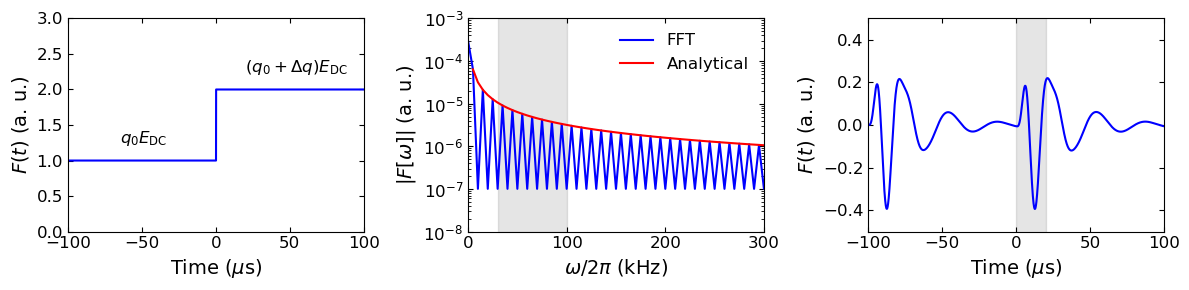

In [77]:
tt = np.linspace(-100e-6, 100e-6, 2**16)
dtt = tt[1] - tt[0]

yy = np.empty_like(tt)
yy[tt < -100e-9] = 1
yy[tt > 100e-9] = 2

idx_between = np.logical_and(tt > -100e-9, tt < 100e-9)
yy[idx_between] = 1 + tt[idx_between] * 1

yy_f = rfft(yy)
ff = rfftfreq(yy.size, tt[1]-tt[0])

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].plot(tt/1e-6, yy, 'b')
axes[1].plot(ff/1000, np.abs(yy_f)*dtt, 'b', label='FFT')
axes[1].plot(ff/1000, 2 * (1/(2 * np.pi * ff)), 'r', label='Analytical')  # Single sided so times 2

axes[0].set_xlim(-100, 100)
axes[0].set_ylim(0, 3)
axes[0].set_xlabel(r'Time ($\mu$s)')
axes[0].set_ylabel(r'$F(t)$ (a. u.)')
axes[0].text(-65, 1.25, r'$q_0 E_\mathrm{DC}$', fontsize=12)
axes[0].text(20, 2.25, r'$(q_0 + \Delta q) E_\mathrm{DC}$', fontsize=12)

axes[1].set_yscale('log')
axes[1].set_xlim(0, 300)
axes[1].set_xlabel(r'$\omega/2 \pi$ (kHz)')
axes[1].set_ylabel(r'$| F[\omega] |$ (a. u.)')
axes[1].set_ylim(1e-8, 1e-3)
axes[1].legend(frameon=False)
axes[1].fill_betweenx(y=[1e-8, 1e-3], x1=30, x2=100, color='k', alpha=0.1)

sos = butter(4, [30000, 100000], 'bandpass', fs=1/dtt, output='sos')
filtered = sosfilt(sos, yy)

axes[2].plot(tt/1e-6, filtered, 'b')
axes[2].set_xlabel(r'Time ($\mu$s)')
axes[2].set_ylabel(r'$F(t)$ (a. u.)')

axes[2].fill_betweenx(y=[-1, 1], x1=0, x2=20, color='k', alpha=0.1)
axes[2].set_ylim(-0.5, 0.5)
axes[2].set_xlim(-100, 100)

fig.tight_layout()
# plt.savefig('dc_noise.pdf', dpi=400)

In [78]:
c = 299792458  # m/s
SI2ev = (1 / 1.6e-19) * c

idx = np.logical_and(tt>0, tt<20e-6)
dp = np.abs((np.trapz(filtered[idx], tt[idx]))) * SI2ev

dp_typical = dp * (2 * 1.6e-19) * (300)
print(f'Induced impulse: {dp_typical/1000:.2f} (Delta q / 2e) * (E_DC / 300 V/m) keV/c')

Induced impulse: 166.15 (Delta q / 2e) * (E_DC / 300 V/m) keV/c


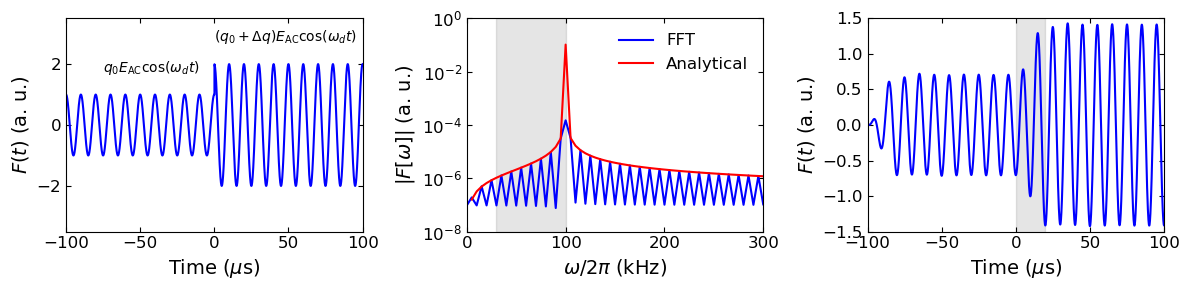

In [157]:
tt = np.linspace(-100e-6, 100e-6, 2**16)
dtt = tt[1] - tt[0]

omegad = 100000 * 2 * np.pi
yy = np.empty_like(tt)
yy[tt < -100e-9] = 1 * np.cos(omegad * tt[tt < -100e-9])
yy[tt > 100e-9] = 2 * np.cos(omegad * tt[tt > 100e-9])

idx_between = np.logical_and(tt > -100e-9, tt < 100e-9)
yy[idx_between] = 1 * np.cos(omegad * tt[idx_between]) + tt[idx_between] * 2 * np.cos(omegad * tt[idx_between])

yy_f = rfft(yy)
ff = rfftfreq(yy.size, tt[1]-tt[0])

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].plot(tt/1e-6, yy, 'b')
axes[1].plot(ff/1000, np.abs(yy_f)*dtt, 'b', label='FFT')
axes[1].plot(ff[1:]/1000, 2 * ((2 * np.pi * ff[1:]) / np.abs(((2 * np.pi * ff[1:])**2 - omegad**2))), 'r', label='Analytical')  # Single sided so times 2

axes[0].set_xlim(-100, 100)
axes[0].set_ylim(-3.5, 3.5)
axes[0].set_xlabel(r'Time ($\mu$s)')
axes[0].set_ylabel(r'$F(t)$ (a. u.)')
axes[0].text(-75, 1.75, r'$q_0 E_\mathrm{AC} \cos(\omega_d t)$', fontsize=10)
axes[0].text(0, 2.75, r'$(q_0 + \Delta q) E_\mathrm{AC} \cos(\omega_d t)$', fontsize=10)

axes[1].set_yscale('log')
axes[1].set_xlim(0, 300)
axes[1].set_xlabel(r'$\omega/2 \pi$ (kHz)')
axes[1].set_ylabel(r'$| F[\omega] |$ (a. u.)')
axes[1].set_ylim(1e-8, 1)
axes[1].legend(frameon=False)
axes[1].fill_betweenx(y=[1e-8, 1], x1=30, x2=100, color='k', alpha=0.1)

sos = butter(4, [30000, 100000], 'bandpass', fs=1/dtt, output='sos')
filtered = sosfilt(sos, yy)

axes[2].plot(tt/1e-6, filtered, 'b')
axes[2].set_xlabel(r'Time ($\mu$s)')
axes[2].set_ylabel(r'$F(t)$ (a. u.)')

axes[2].fill_betweenx(y=[-2, 2], x1=0, x2=20, color='k', alpha=0.1)
axes[2].set_ylim(-1.5, 1.5)
axes[2].set_xlim(-100, 100)

fig.tight_layout()
# plt.savefig('ac_noise.pdf', dpi=400)

In [158]:
idx = np.logical_and(tt>0, tt<20e-6)
dp = np.abs((np.trapz(filtered[idx], tt[idx]))) * SI2ev

dp_typical = dp * (2 * 1.6e-19) * (300)
print(f'Induced impulse: {dp_typical/1000:.2f} (Delta q / 2e) * (E_AC / 300 V/m) keV/c')

Induced impulse: 14.56 (Delta q / 2e) * (E_AC / 300 V/m) keV/c


In [154]:
omegad_list = np.linspace(55000, 1000000, 1200) * 2 * np.pi
dps = np.empty_like(omegad_list)

sos = butter(4, [30000, 100000], 'bandpass', fs=1/dtt, output='sos')

for i, omegad in enumerate(omegad_list):
    yy = np.empty_like(tt)
    yy[tt < -100e-9] = 1 * np.cos(omegad * tt[tt < -100e-9])
    yy[tt > 100e-9] = 2 * np.cos(omegad * tt[tt > 100e-9])

    filtered = sosfilt(sos, yy)

    idx = np.logical_and(tt>0, tt<20e-6)
    dp = np.abs((np.trapz(filtered[idx], tt[idx]))) * SI2ev

    dp_typical = dp * (2 * 1.6e-19) * (300)
    dps[i] = dp_typical

(0.0, 1000.0)

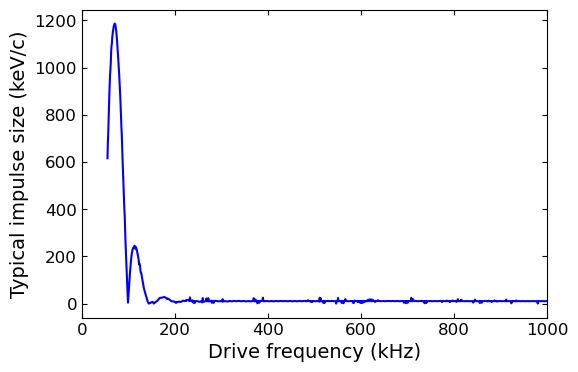

In [155]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.plot(omegad_list/(2*np.pi*1000), dps/1000, 'b')
# ax.set_yscale('log')
ax.set_xlabel('Drive frequency (kHz)')
ax.set_ylabel('Typical impulse size (keV/c)')
ax.set_xlim(0, 1000)

(0.0, 2880.0)

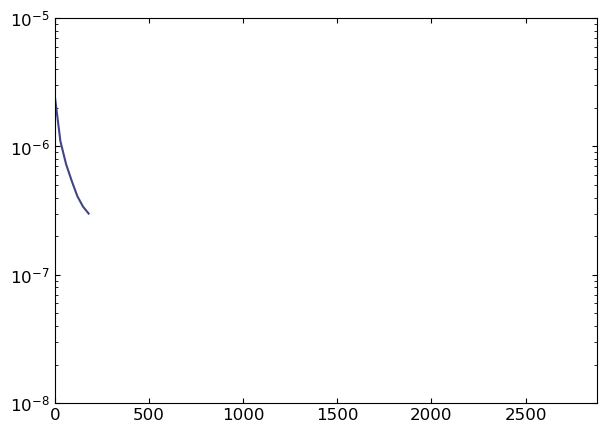

In [160]:
time = np.arange(7) * 30
pressure = [2.5e-6, 1.1e-6, 7.3e-7, 5.4e-7, 4.1e-7, 3.4e-7, 3e-7]

plt.plot(time, pressure)
plt.yscale('log')
plt.ylim(1e-8, 1e-5)
plt.xlim(0, 60*48)